# Comparison to analytic solution

 Use python pandas modules to load data, use matplotlib to plot the results. Write a python modules for the analytic reference solution between two disks, put it into the modules folder and import it here. You can also write latex formula here if required $a^2 + b^2 = c^2$.

<Figure size 600x400 with 0 Axes>

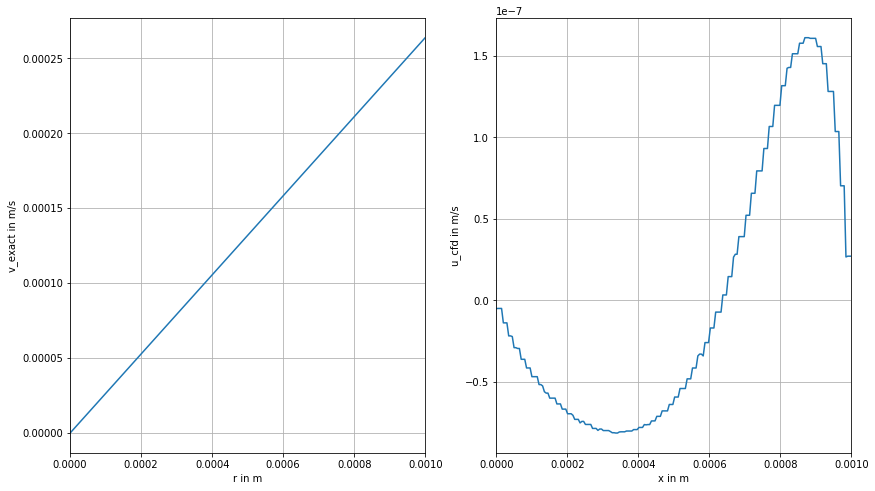

<Figure size 600x400 with 0 Axes>

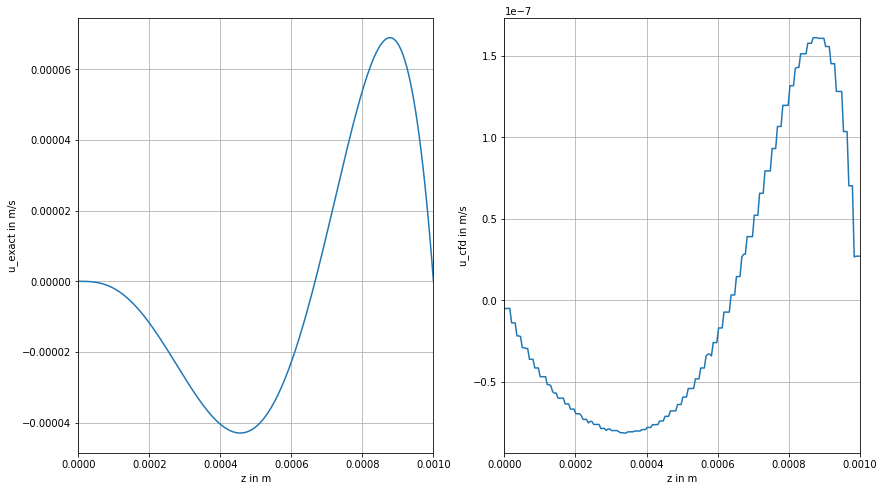

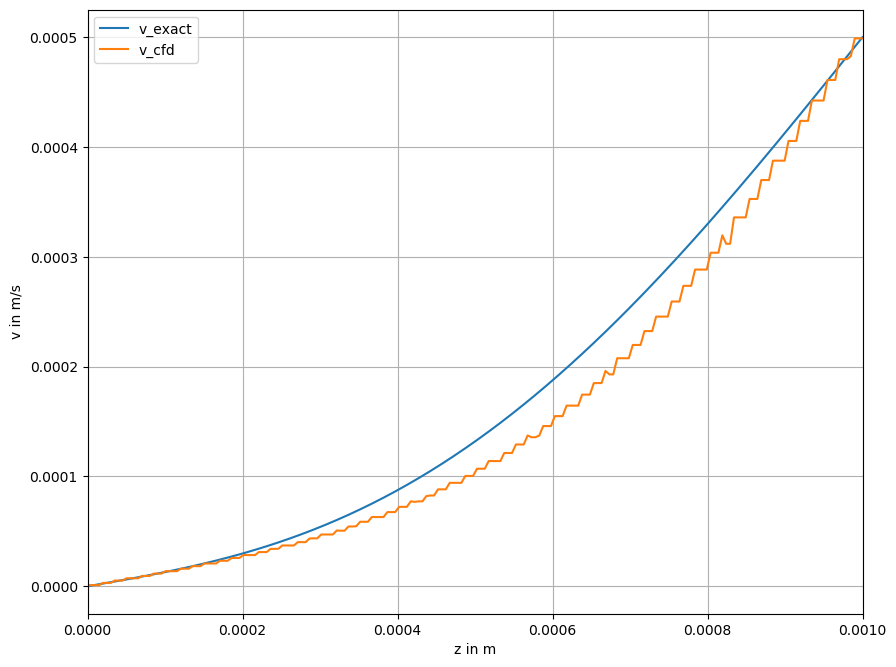

<Figure size 600x400 with 0 Axes>

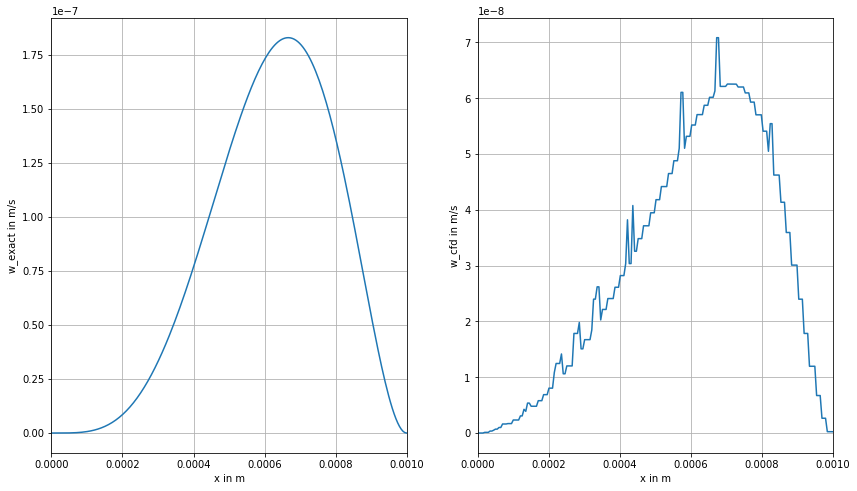

<Figure size 600x400 with 0 Axes>

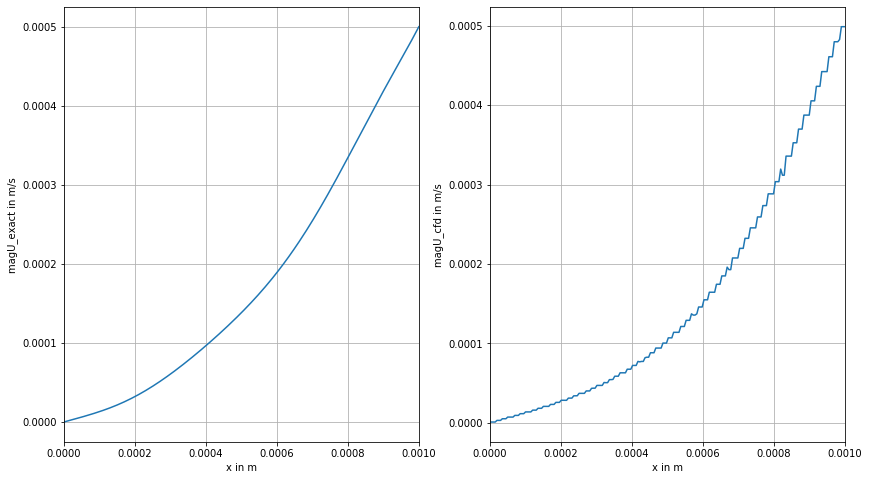

In [15]:
%matplotlib inline 
# this above line is required to show plots here
# plotting of a linear function (the above line is required to )
import matplotlib.pyplot as plt
import numpy as np # please install numpy and use it
import pandas as pd
import sys, os

# make the modules available
sys.path.insert(1, os.getcwd() + '/../modules/')
import analytic.rotatingDiscsFlow as rdf

# (u,v,w) corresponds to (r,theta,z)

cfd_data = pd.read_csv("../cases/wedge/data_U.csv")
u_cfd = cfd_data['U_1']
v_cfd = cfd_data['U_2']
w_cfd = cfd_data['U_0']
magU_cfd = cfd_data['magU']

h = 1e-3
r_max = 1e-3
w = 1
nu = 1e-5

z = 0.5*h
r = np.linspace(0,r_max,200)
#v_exact_r = w*r*((0.77139*h*np.sqrt(w/nu)-1)/h**4*z**4+(2-1.54278*h*np.sqrt(w/nu))/h**3*z**3+0.77139*z*np.sqrt(w/nu))
v_exact_r = rdf.rotatingflow(0.5*h, r, h, w, nu)[1]
fig1 = plt.figure(dpi=100)
fig5, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].plot(r,v_exact_r);
axes[0].set_xlim([0,r_max])
axes[0].set_xlabel('r in m')
axes[0].set_ylabel('v_exact in m/s')
axes[0].grid()

axes[1].plot(r,u_cfd);
axes[1].set_xlim([0,h])
axes[1].set_xlabel('x in m')
axes[1].set_ylabel('u_cfd in m/s')
axes[1].grid()

z = np.linspace(0,h,200)
r = 0.5*r_max
u_exact, v_exact, w_exact, magU_exact = rdf.rotatingflow(z, r, h, w, nu)

fig1 = plt.figure(dpi=100)
fig1, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].plot(z,u_exact);
axes[0].set_xlim([0,h])
axes[0].set_xlabel('z in m')
axes[0].set_ylabel('u_exact in m/s')
axes[0].grid()

axes[1].plot(z,u_cfd);
axes[1].set_xlim([0,h])
axes[1].set_xlabel('z in m')
axes[1].set_ylabel('u_cfd in m/s')
axes[1].grid()

fig2 = plt.figure(dpi=100,figsize=(10,8))

plt.plot(z,v_exact);
plt.plot(z,v_cfd);
plt.xlim([0,h])
plt.xlabel('z in m')
plt.ylabel('v in m/s')
plt.grid()
plt.legend(['v_exact','v_cfd'])
'''
axes[1].plot(x,v_cfd);
axes[1].set_xlim([0,h])
axes[1].set_xlabel('x in m')
axes[1].set_ylabel('v_cfd in m/s')
axes[1].grid()
'''
fig3 = plt.figure(dpi=100)
fig3, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].plot(z,w_exact);
axes[0].set_xlim([0,h])
axes[0].set_xlabel('x in m')
axes[0].set_ylabel('w_exact in m/s')
axes[0].grid()

axes[1].plot(z,w_cfd);
axes[1].set_xlim([0,h])
axes[1].set_xlabel('x in m')
axes[1].set_ylabel('w_cfd in m/s')
axes[1].grid()

fig4 = plt.figure(dpi=100)
fig4, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].plot(z,magU_exact);
axes[0].set_xlim([0,h])
axes[0].set_xlabel('x in m')
axes[0].set_ylabel('magU_exact in m/s')
axes[0].grid()

axes[1].plot(z,magU_cfd);
axes[1].set_xlim([0,h])
axes[1].set_xlabel('x in m')
axes[1].set_ylabel('magU_cfd in m/s')
axes[1].grid()

plt.show()